<a href="https://colab.research.google.com/github/trehansalil/twitter_ner_analysis/blob/main/experimental_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install stanza

  Using cached stanza-1.8.1-py3-none-any.whl (970 kB)
  Using cached emoji-2.10.1-py2.py3-none-any.whl (421 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 770.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99

In [1]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-mqfk18oe
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-mqfk18oe
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=2f966fbd90dc8c3199aa77848d2b963f23fdc09b10d3034bb01175ef0c0fb8ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-djneroof/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [3]:
!nvidia-smi


Fri Mar 15 11:13:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
def read_conll(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        current_sentence = []
        for line in lines:
            line = line.strip()
            if line:
                parts = line.split('\t')
                current_sentence.append(parts)
            else:
                if current_sentence:
                    sentences.append(current_sentence)
                    current_sentence = []
        if current_sentence:
            sentences.append(current_sentence)
    return sentences

In [5]:
import pandas as pd

# Importing and understanding the structure of the data
train_data_path = '/content/wnut 16.txt.conll'
test_data_path = '/content/wnut 16test.txt.conll'

# Read and understand the structure of the data
train_sentences = read_conll(train_data_path)
test_sentences = read_conll(test_data_path)



In [6]:
combined_sentences = train_sentences+ test_sentences

In [7]:
print(len(train_sentences), len(train_sentences[0][0]))
print(len(test_sentences), len(test_sentences[0][0]))

print("Number of sentences in training data: ", len(train_sentences))
print("Number of sentences in testing data: ", len(test_sentences))

2394 2
3850 2
Number of sentences in training data:  2394
Number of sentences in testing data:  3850


In [8]:
print("Number of sentences in combined data: ", len(combined_sentences))

Number of sentences in combined data:  6244


In [9]:
words = []
labels = []

[words.extend([word[0] for word in sentence if word[0] not in words]) for sentence in combined_sentences]
[labels.extend([word[1] for word in sentence if word[1] not in labels]) for sentence in combined_sentences]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
len(words)

25815

In [11]:
words = list(set(words))
n_words = len(words)
print("Number of unique words in the dataset: ", n_words)

Number of unique words in the dataset:  25383


In [12]:

tags = list(set(labels))
n_tags = len(tags)
print("Number of unique labels in the dataset: ", n_tags)
print("Tags:", tags)

Number of unique labels in the dataset:  21
Tags: ['B-geo-loc', 'I-product', 'B-sportsteam', 'I-other', 'B-product', 'B-company', 'I-geo-loc', 'I-facility', 'I-sportsteam', 'B-tvshow', 'O', 'B-musicartist', 'I-musicartist', 'I-company', 'B-other', 'I-person', 'B-facility', 'I-movie', 'I-tvshow', 'B-person', 'B-movie']


In [16]:
import sklearn

# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}

word_map = 'Washington'

print(f"The word {word_map} is identified by the index: {word2idx[word_map]}")
print("The labels B-geo(which defines Geopraphical Enitities) is identified by the index: {}".format(tag2idx["B-tvshow"]))

The word Washington is identified by the index: 14671
The labels B-geo(which defines Geopraphical Enitities) is identified by the index: 10


In [17]:
max_len = max(len(seq) for seq in train_sentences)

In [18]:
import numpy as np
from keras.utils import to_categorical

#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in train_sentences]


# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=word2idx["PAD"])

# Convert each sentence from list of Token to list of word_index
X_test = [[word2idx[w[0]] for w in s] for s in test_sentences]


# Padding each sentence to have the same lenght
X_test = pad_sequences(maxlen=max_len, sequences=X_test, padding="post", value=word2idx["PAD"])

# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in train_sentences]

# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["PAD"])

# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]  # n_tags+1(PAD)

# Convert Tag/Label to tag_index
y_test = [[tag2idx[w[1]] for w in s] for s in test_sentences]

# Padding each sentence to have the same lenght
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tag2idx["PAD"])

# One-Hot encode
y_test = [to_categorical(i, num_classes=n_tags+1) for i in y_test]  # n_tags+1(PAD)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
X_train.shape, X_val.shape, np.array(y_train).shape, np.array(y_val).shape, X_test.shape, np.array(y_test).shape

((2154, 39),
 (240, 39),
 (2154, 39, 22),
 (240, 39, 22),
 (3850, 39),
 (3850, 39, 22))

In [19]:
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [20]:
words = list(set(words))
words.append("ENDPAD")

n_words = len(words); n_words

25384

In [21]:
len(tags)

21

In [70]:
from keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow as tf

# LSTM components
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

# CRF layer
from tensorflow_addons.layers import CRF

# Sigmoid focal cross entropy loss. works well with highly unbalanced input data
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from tensorflow_addons.optimizers import AdamW


def build_model(max_len = max_len, input_dim = n_words, embedding_dim = 200):
  import keras as k
  # Model definition
  input = Input(shape=(max_len,))

  # Get embeddings
  embeddings = Embedding(input_dim=input_dim,
                      output_dim=embedding_dim,
                      input_length=max_len, mask_zero=True)(input)

  # variational biLSTM
  output_sequences = Bidirectional(LSTM(units=200,
                                        return_sequences=True,
                                        dropout=0.3,
                                        recurrent_dropout=0.4,
                            kernel_initializer=k.initializers.he_normal()))(embeddings)

  # Stacking
  output_sequences = Bidirectional(LSTM(units=200, return_sequences=True,
                                        dropout=0.3,
                                        recurrent_dropout=0.4,
                           kernel_initializer=k.initializers.he_normal()))(output_sequences)
  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=100,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  output_sequences = LSTM(units=50,
              return_sequences=True,
              dropout=0.3,
              recurrent_dropout=0.4,
              kernel_initializer=k.initializers.he_normal())(output_sequences)

  # Adding more non-linearity
  dense_out = TimeDistributed(Dense(n_tags+1, activation="relu"))(output_sequences)

  # CRF layer
  crf = CRF(n_tags+1, name='crf')
  predicted_sequence, potentials, sequence_length, crf_kernel = crf(dense_out)

  model = Model(input, potentials)
  model.compile(
      optimizer=AdamW(weight_decay=0.00001),
      loss= SigmoidFocalCrossEntropy()) # Sigmoid focal cross entropy loss

  return model

model = build_model()

# model.compile(
#     optimizer=AdamW(weight_decay=0.001),
#     loss= SigmoidFocalCrossEntropy()) # Sigmoid focal cross entropy loss



# Checkpointing
save_model = tf.keras.callbacks.ModelCheckpoint(filepath='twitter_ner_crf.h5',
  monitor='val_loss',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)

callbacks = [save_model, es]

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 39)]              0         
                                                                 
 embedding_10 (Embedding)    (None, 39, 200)           5076800   
                                                                 
 bidirectional_20 (Bidirect  (None, 39, 400)           641600    
 ional)                                                          
                                                                 
 bidirectional_21 (Bidirect  (None, 39, 400)           961600    
 ional)                                                          
                                                                 
 lstm_41 (LSTM)              (None, 39, 100)           200400    
                                                                 
 lstm_42 (LSTM)              (None, 39, 100)           804

In [71]:
n_words

25384

In [ ]:
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data = (X_val, y_val), shuffle = True)

Epoch 1/15


68/68 [==============================] - 116s 1s/step - loss: 0.2748 - val_loss: 0.1207
Epoch 2/15
68/68 [==============================] - 89s 1s/step - loss: 0.1188 - val_loss: 0.0880
Epoch 3/15
68/68 [==============================] - 87s 1s/step - loss: 0.0838 - val_loss: 0.0761
Epoch 4/15
68/68 [==============================] - 88s 1s/step - loss: 0.0661 - val_loss: 0.0574
Epoch 5/15
68/68 [==============================] - 88s 1s/step - loss: 0.0547 - val_loss: 0.0540
Epoch 6/15
68/68 [==============================] - 88s 1s/step - loss: 0.0498 - val_loss: 0.0476
Epoch 7/15
68/68 [==============================] - 88s 1s/step - loss: 0.0458 - val_loss: 0.0446
Epoch 8/15
33/68 [=============>................] - ETA: 45s - loss: 0.0453

In [69]:
p = model.predict(np.array(X_test))
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, 2).ravel(), np.argmax(p, axis=2).ravel(),labels=list(idx2tag.keys()), target_names=list(idx2tag.values())))

121/121 [==============================] - 16s 112ms/step
               precision    recall  f1-score   support

    B-geo-loc       0.00      0.00      0.00       882
    I-product       0.00      0.00      0.00       500
 B-sportsteam       0.00      0.00      0.00       147
      I-other       0.00      0.00      0.00       556
    B-product       0.00      0.00      0.00       246
    B-company       0.00      0.00      0.00       621
    I-geo-loc       0.00      0.00      0.00       219
   I-facility       0.00      0.00      0.00       366
 I-sportsteam       0.00      0.00      0.00        48
     B-tvshow       0.00      0.00      0.00        33
            O       0.90      0.77      0.83     55953
B-musicartist       0.00      0.00      0.00       191
I-musicartist       0.00      0.00      0.00       140
    I-company       0.00      0.00      0.00       265
      B-other       0.00      0.00      0.00       584
     I-person       0.00      0.00      0.00       300
   B-f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import stanza
stanza.download('en', package='mimic',processors={'ner':'i2b2'})
stanza.download('en', package='mimic',processors={'ner':'bc5cdr'})

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| backward_charlm | mimic          |
| pretrain        | mimic          |
| forward_charlm  | mimic          |



INFO:stanza:Downloaded file to /root/stanza_resources/en/tokenize/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/pos/mimic_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/lemma/mimic_nocharlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/depparse/mimic_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/ner/i2b2.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/backward_charlm/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/pretrain/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/forward_charlm/mimic.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | bc5cdr         |
| backward_charlm | mimic          |
| pretrain        | biomed         |
| pretrain        | mimic          |
| forward_charlm  | pubmed         |
| backward_charlm | pubmed         |
| forward_charlm  | mimic          |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/mimic.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/mimic_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/mimic_nocharlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/depparse/mimic_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/ner/bc5cdr.pt
INFO:stanza:File exists: /root/stanza_resources/en/backward_charlm/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/pretrain/biomed.pt
INFO:stanza:File exists: /root/stanza_resources/en/pretrain/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/forward_charlm/pubmed.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/backward_charlm/pubmed.pt
INFO:stanza:File exists: /root/stanza_resources/en/forward_charlm/mimic.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [34]:
nlp1 = stanza.Pipeline('en', package='mimic', processors={'ner':'i2b2'})
nlp2= stanza.Pipeline('en', package='mimic', processors={'ner':'bc5cdr'})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | bc5cdr         |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [35]:
#Let's check a sample sentence with i2b2
doc = nlp1("This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch")
doc.entities

[{
   "text": "birth control",
   "type": "TREATMENT",
   "start_char": 40,
   "end_char": 53
 },
 {
   "text": "the patch",
   "type": "TREATMENT",
   "start_char": 81,
   "end_char": 90
 },
 {
   "text": "my cramps",
   "type": "PROBLEM",
   "start_char": 305,
   "end_char": 314
 },
 {
   "text": "cramps",
   "type": "PROBLEM",
   "start_char": 372,
   "end_char": 378
 },
 {
   "text": "birth control",
   "type": "TREATMENT",
   "start_char": 392,
   "end_char": 405
 },
 {
   "text": "the patch",
   "type": "TREATMENT",
   "start_char": 437,
   "end_char": 446
 }]

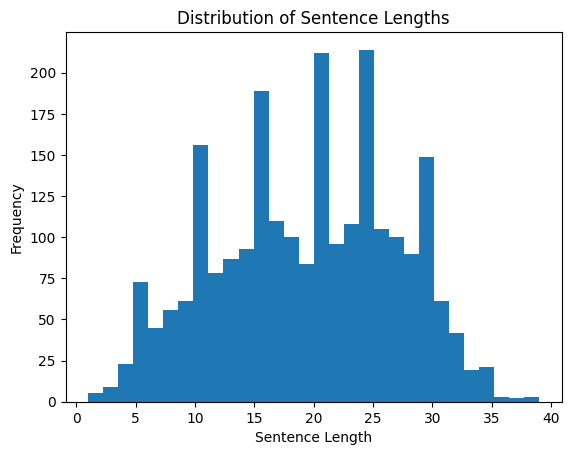

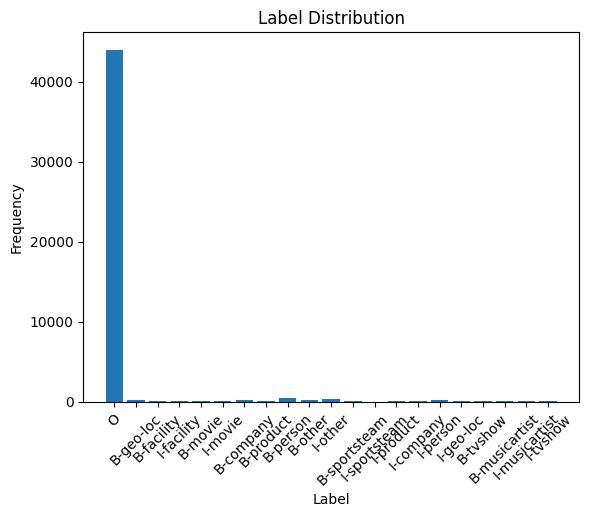

Number of Unique Words: 10586
Label Types: {'B-geo-loc', 'I-product', 'B-company', 'I-company', 'I-sportsteam', 'B-other', 'I-movie', 'B-movie', 'B-facility', 'I-musicartist', 'I-tvshow', 'O', 'B-tvshow', 'I-other', 'I-geo-loc', 'B-person', 'B-product', 'B-musicartist', 'B-sportsteam', 'I-facility', 'I-person'}


In [ ]:
import matplotlib.pyplot as plt

# Length of Sentences
sentence_lengths = [len(sentence) for sentence in words]

plt.hist(sentence_lengths, bins=30)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

# Label Distribution
label_counts = {}
for sentence_labels in labels:
    for label in sentence_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

plt.bar(label_counts.keys(), label_counts.values())
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Unique Words
unique_words = set(word for sentence in words for word in sentence)
num_unique_words = len(unique_words)
print("Number of Unique Words:", num_unique_words)

# Label Types
label_types = set(label for sentence_labels in labels for label in sentence_labels)
print("Label Types:", label_types)


In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 725.5/731.7 MB 3.0 MB/s eta 0:00:03